In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
#import libraries

**description about the dataset **

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

In [3]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
#import dataset

In [4]:
#data-points and features?
df.shape

(150, 6)

In [5]:
df.head()
#topmost values  of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.columns
#column names in our dataset?

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df = df.drop('Id', axis=1)
#drop id column

In [8]:
df['Species'].value_counts()
#balanced dataset as the number of data points for every class is 50.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.describe()
#gives info about the min, max standard deviation, etc

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()
#info about dataset no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


2-D Scatter Plot

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


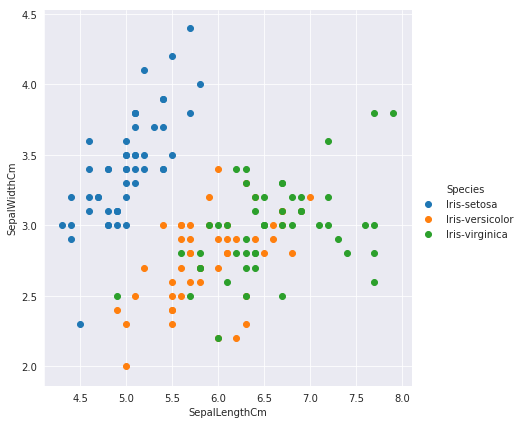

In [11]:
sns.set_style("darkgrid");
sns.FacetGrid(df, hue='Species' ,size=6).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend();
plt.show();
#iris-setosa can be easily seperated
#but iris-versicolor, iris-virginica both overlapping each other

**Observation(s):**

* Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
* Seperating Versicolor from Viginica is much harder as they have considerable overlap.

**3D Scatter plot**

In [12]:
import plotly.express as px
fig = px.scatter_3d(df, 'SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
                    color='PetalLengthCm', symbol='Species')
fig.show()

**Pair-plot**

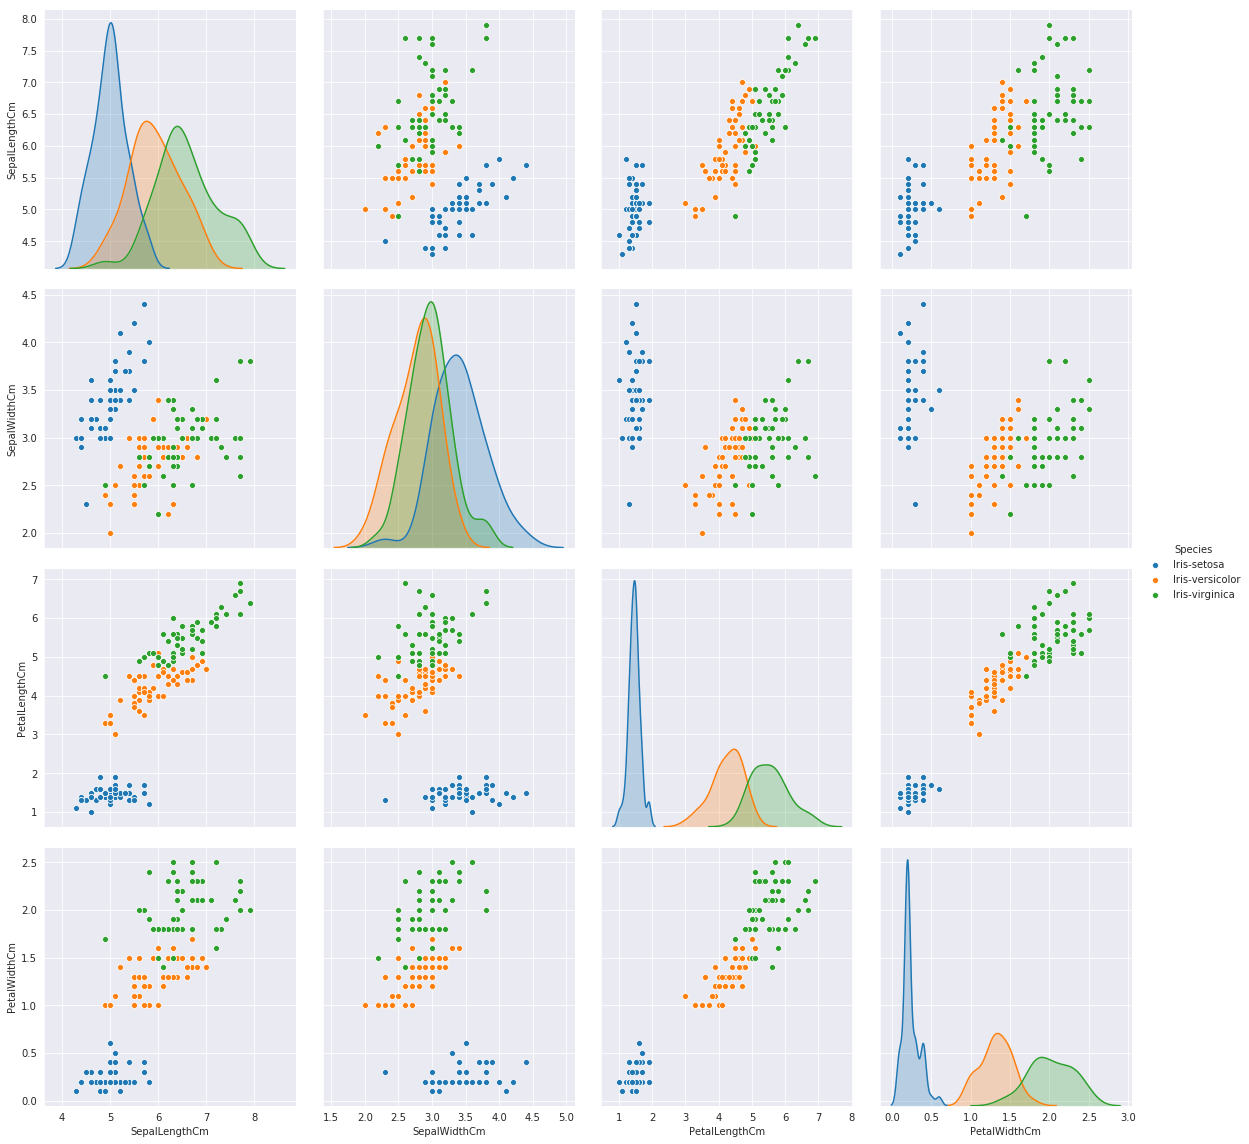

In [13]:
# pairwise scatter plot
plt.close();
sns.set_style("darkgrid");
sns.pairplot(df, hue='Species',height=4);
plt.show()
#shows distribution of features
#petallengthcm and petalwidthcm 

**Observations**

* petal_length and petal_width are the most useful features to identify various flower types.
* Setosa can be easily identified (linearly seperable), Virginica and Versicolor have some overlap (almost linearly seperable).


**Histogram, PDF, CDF**


In [14]:
df.Species.value_counts()
#3 type of flower species total=150
#and each have 50 observations

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

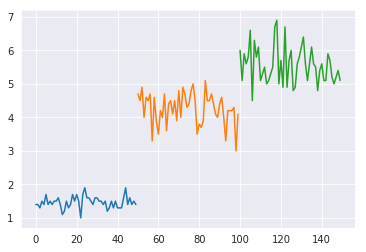

In [15]:
import numpy as np
iris_setosa = df.loc[df['Species'] == 'Iris-setosa'];
iris_virginica = df.loc[df['Species'] == 'Iris-virginica'];
iris_versicolor = df.loc[df['Species'] == 'Iris-versicolor'];

plt.plot(iris_setosa['PetalLengthCm'])
plt.plot(iris_versicolor['PetalLengthCm'])
plt.plot(iris_virginica['PetalLengthCm'])
plt.show()

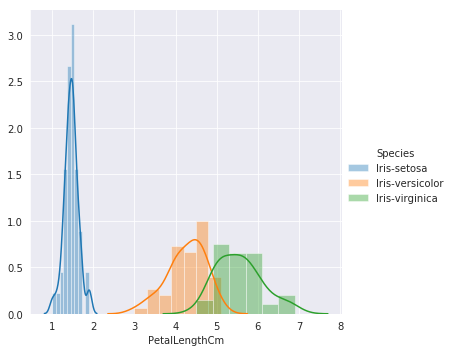

In [16]:
sns.FacetGrid(df, hue='Species', height=5).map(sns.distplot, 'PetalLengthCm').add_legend();
plt.show();
#flowers of petallengthcm having 1-2cm are iris setosa 
#flowers petallengthcm having more(2.3 to 5.6 for versicolor, 4 to 7.9 virginica) then that are or iris-virginica and iris-versicolor

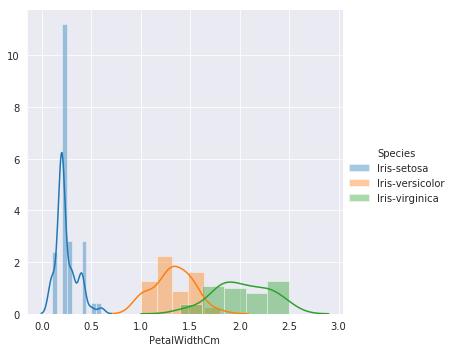

In [17]:
sns.FacetGrid(df, hue='Species', height=5).map(sns.distplot, 'PetalWidthCm').add_legend();
plt.show();
#not much of spread, setosa is peaked

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



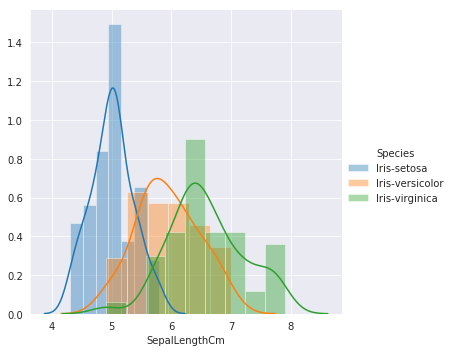

In [18]:
sns.FacetGrid(df, hue='Species', size=5).map(sns.distplot, 'SepalLengthCm').add_legend();
plt.show();
#all overlapped 

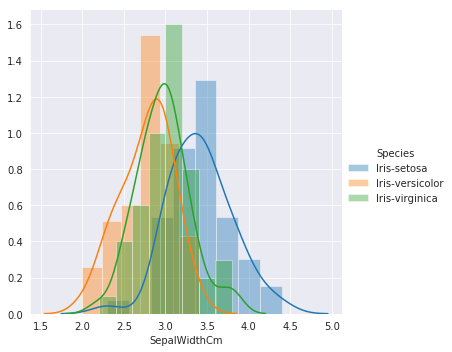

In [19]:
sns.FacetGrid(df, hue='Species', size=5).map(sns.distplot, 'SepalWidthCm').add_legend();
plt.show();

#Plot CDF of petal_length
cumulative density probability is area under the curve (pdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


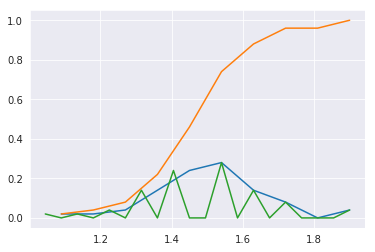

In [20]:
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf);

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=20, density=True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:], pdf);
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


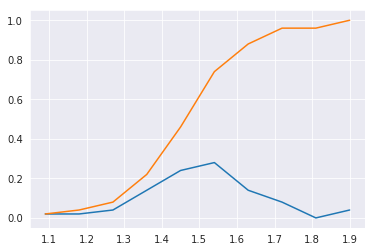

In [21]:
#Cumulative Distribution Function (CDF)
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] , pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


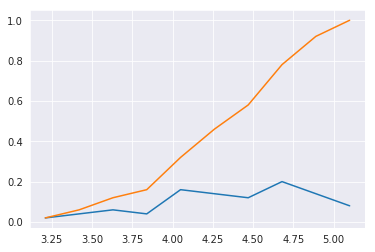

In [22]:
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] , pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.14 0.06 0.1  0.26 0.   0.14 0.2  0.06 0.02 0.02]
[1.   1.08 1.16 1.24 1.32 1.4  1.48 1.56 1.64 1.72 1.8 ]


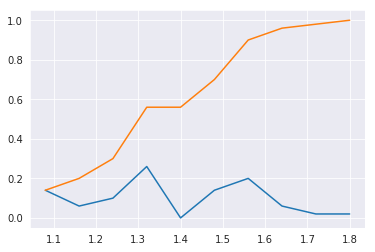

In [23]:
counts, bin_edges = np.histogram(iris_versicolor['PetalWidthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] , pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.06 0.02 0.02 0.22 0.1  0.12 0.12 0.06 0.16 0.12]
[1.4  1.51 1.62 1.73 1.84 1.95 2.06 2.17 2.28 2.39 2.5 ]


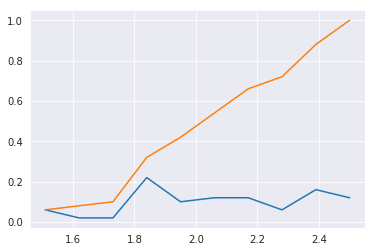

In [24]:
counts, bin_edges = np.histogram(iris_virginica['PetalWidthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] , pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

*  Plots of CDF of petal_length for various types of flowers.
*  Misclassification error if you use petal_length only.

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


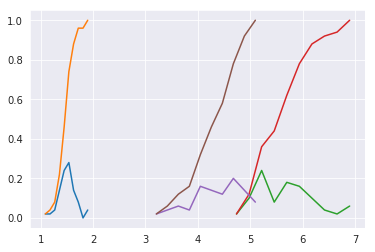

In [25]:
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

#virginica 
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();
#pdf and cdf of all three flower species

**Mean, Variance and Std-dev**
means : average , central tendency
variance , spread of the points 
std dev : avg distance of points from mean 

In [26]:
print('means')
print(np.mean(iris_setosa['PetalLengthCm']))
print(np.mean(iris_virginica['PetalLengthCm']))
print(np.mean(iris_versicolor['PetalLengthCm']))

print('\nstd-dev')
print(np.std(iris_setosa['PetalLengthCm']))
print(np.std(iris_virginica['PetalLengthCm']))
print(np.std(iris_versicolor['PetalLengthCm']))

means
1.464
5.552
4.26

std-dev
0.17176728442867115
0.5463478745268441
0.4651881339845204


 **Median, Percentile, Quantile, IQR, MAD**
 median:The median is the value separating the higher half from the lower half of a data
 Quantile : parts divided in equal four parts
 IQR : inter quartile (Q75-Q25)  difference between quartiles
 mad : median absolute deviation

In [27]:

print("\nMedians:")
print(np.median(iris_setosa["PetalLengthCm"]))
print(np.median(iris_virginica["PetalLengthCm"]))
print(np.median(iris_versicolor["PetalLengthCm"]))

print("\nQuantiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["PetalLengthCm"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],90))
print(np.percentile(iris_virginica["PetalLengthCm"],90))
print(np.percentile(iris_versicolor["PetalLengthCm"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(iris_virginica["PetalLengthCm"]))
print(robust.mad(iris_versicolor["PetalLengthCm"]))


Medians:
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


**Box plot and Whiskers**

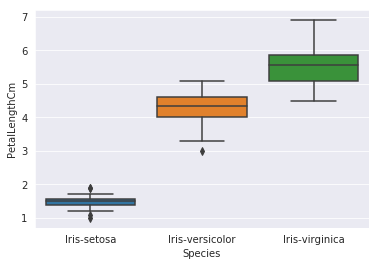

In [28]:
# boxplot is a standardized way of displaying the distribution of data based
sns.boxplot(x='Species',y='PetalLengthCm', data=df)
plt.show()
#tells min, max ,25 50 75 

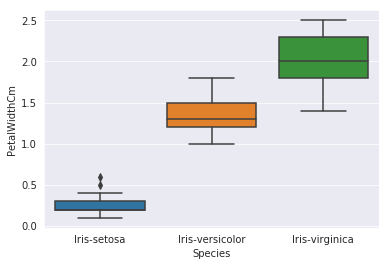

In [29]:
sns.boxplot(x='Species',y='PetalWidthCm', data=df)
plt.show()


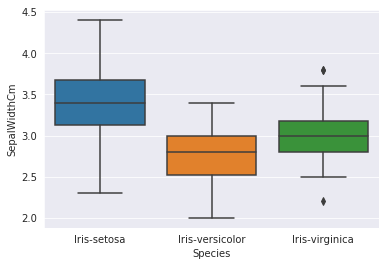

In [30]:
sns.boxplot(x='Species',y='SepalWidthCm', data=df)
plt.show()

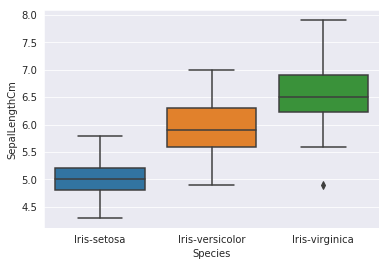

In [31]:
sns.boxplot(x='Species',y='SepalLengthCm', data=df)
plt.show()

**Violin plots**

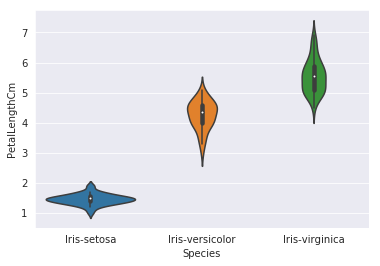

In [32]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=10)
plt.show()

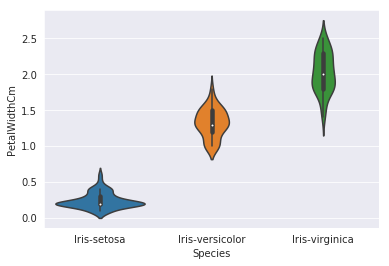

In [33]:
sns.violinplot(x="Species", y="PetalWidthCm", data=df, size=10)
plt.show()

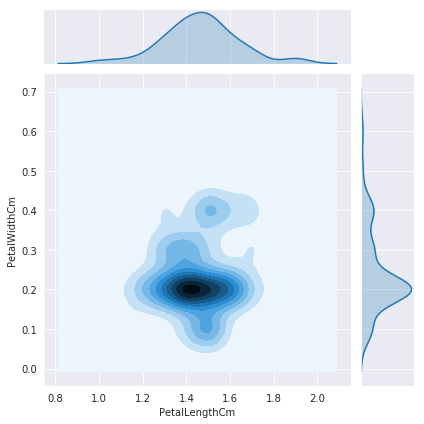

In [34]:
#2D Density plot, contors-plot
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris_setosa, kind="kde");
plt.show();

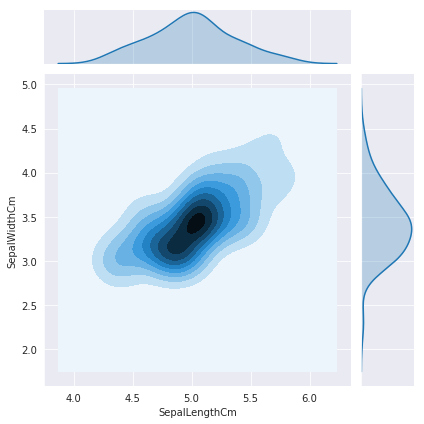

In [35]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris_setosa, kind="kde");
plt.show();

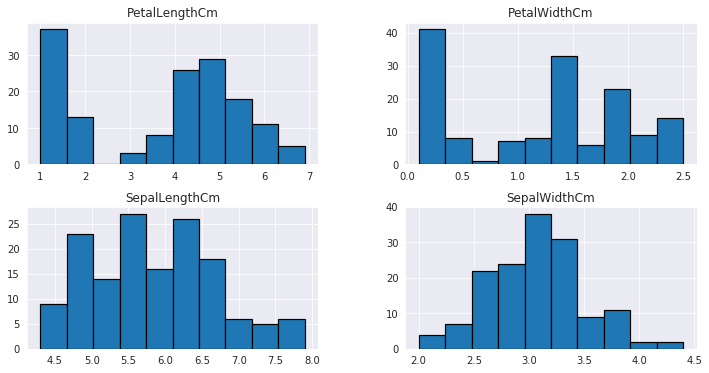

In [36]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

**Now let us see how the length and width vary according to the species**

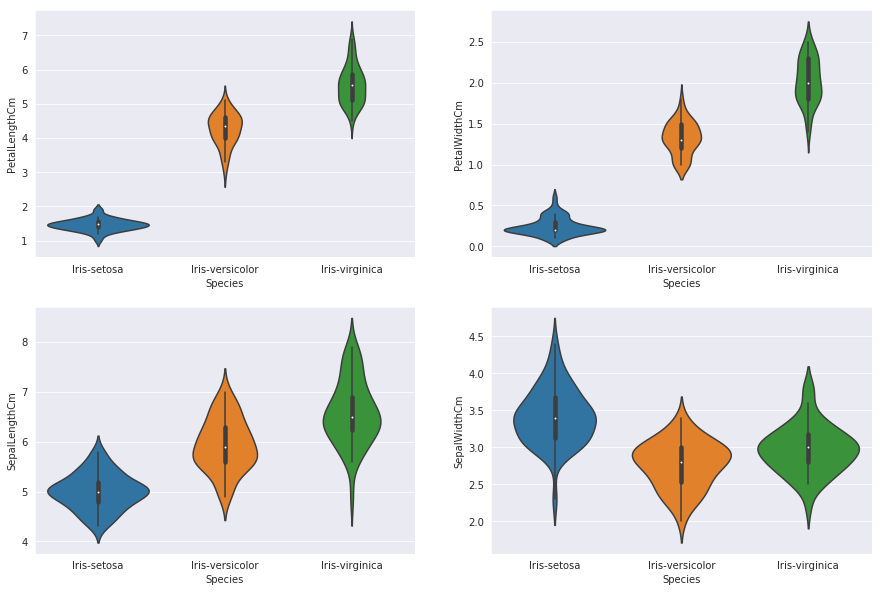

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2,1)
sns.violinplot(x='Species', y='PetalLengthCm' , data=df)
plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='PetalWidthCm', data=df)
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='SepalWidthCm', data=df)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [39]:
df.shape

(150, 5)

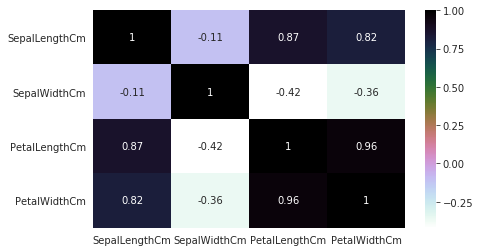

In [40]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [41]:
train, test = train_test_split(df, test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [42]:
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species
test_x = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [43]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
47,4.6,3.2,1.4,0.2
127,6.1,3.0,4.9,1.8
42,4.4,3.2,1.3,0.2
17,5.1,3.5,1.4,0.3
137,6.4,3.1,5.5,1.8


In [44]:
train_y.head()

47        Iris-setosa
127    Iris-virginica
42        Iris-setosa
17        Iris-setosa
137    Iris-virginica
Name: Species, dtype: object

In [45]:
model = svm.SVC() #select the algorithm
model.fit(train_x,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_x) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9111111111111111


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

